# Differential gene expression analysis

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib as mpl

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

## Loading Microarray data

In [2]:
expression = pd.read_excel('Counts.xlsx')
print('Expression File Contains')
expression.info()


Expression File Contains
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Geneid  206 non-null    object
 1   C1      206 non-null    int64 
 2   C2      206 non-null    int64 
 3   G1      206 non-null    int64 
 4   G2      206 non-null    int64 
 5   O1      206 non-null    int64 
 6   O2      206 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 11.4+ KB


In [3]:
# Elimina las filas con datos iguales a 0 en las columnas
expression = expression.loc[(expression['C1'] != 0) & (expression['C2'] != 0) &
                            (expression['G1'] != 0) & (expression['G2'] != 0) & (expression['O1'] != 0) & (expression['O2'] != 0)]

expression.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 205
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Geneid  194 non-null    object
 1   C1      194 non-null    int64 
 2   C2      194 non-null    int64 
 3   G1      194 non-null    int64 
 4   G2      194 non-null    int64 
 5   O1      194 non-null    int64 
 6   O2      194 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 12.1+ KB


In [4]:
# Guarda el DataFrame tratado en un nuevo archivo Excel
expression.to_excel('Counts_tratado.xlsx')

print("Excel tratado guardado exitosamente como 'Counts_tratado.xlsx'")

Excel tratado guardado exitosamente como 'Counts_tratado.xlsx'


## Quality Checking

<ipython-input-5-0ffcdb5061b6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(expression[i], hist=False,label=i,axlabel ='Expression')
<ipython-input-5-0ffcdb5061b6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(expression[i], hist=False,label=i,axlabel ='Expression')
<ipy

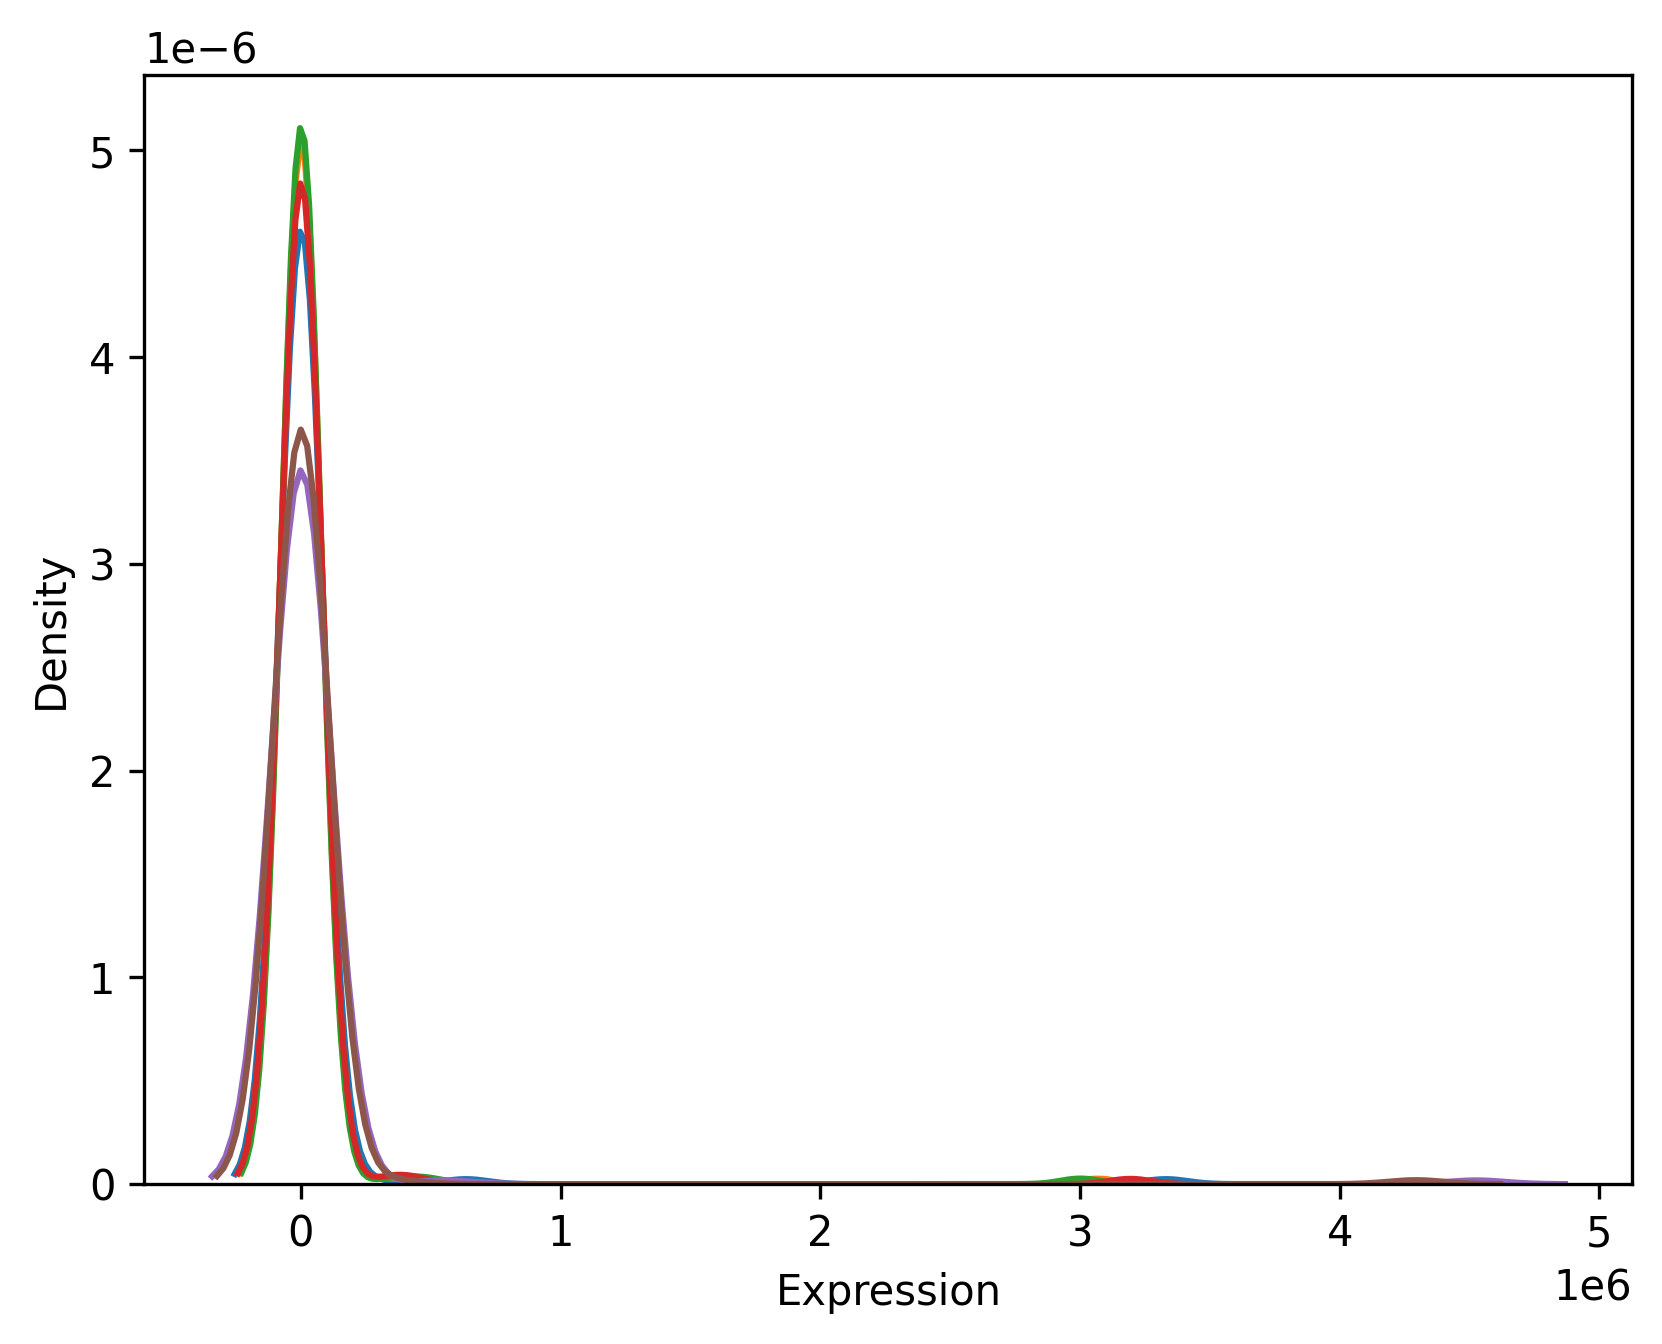

In [5]:
for i in expression.columns[1:]:

    sns.distplot(expression[i], hist=False,label=i,axlabel ='Expression')

Text(0, 0.5, 'Expression')

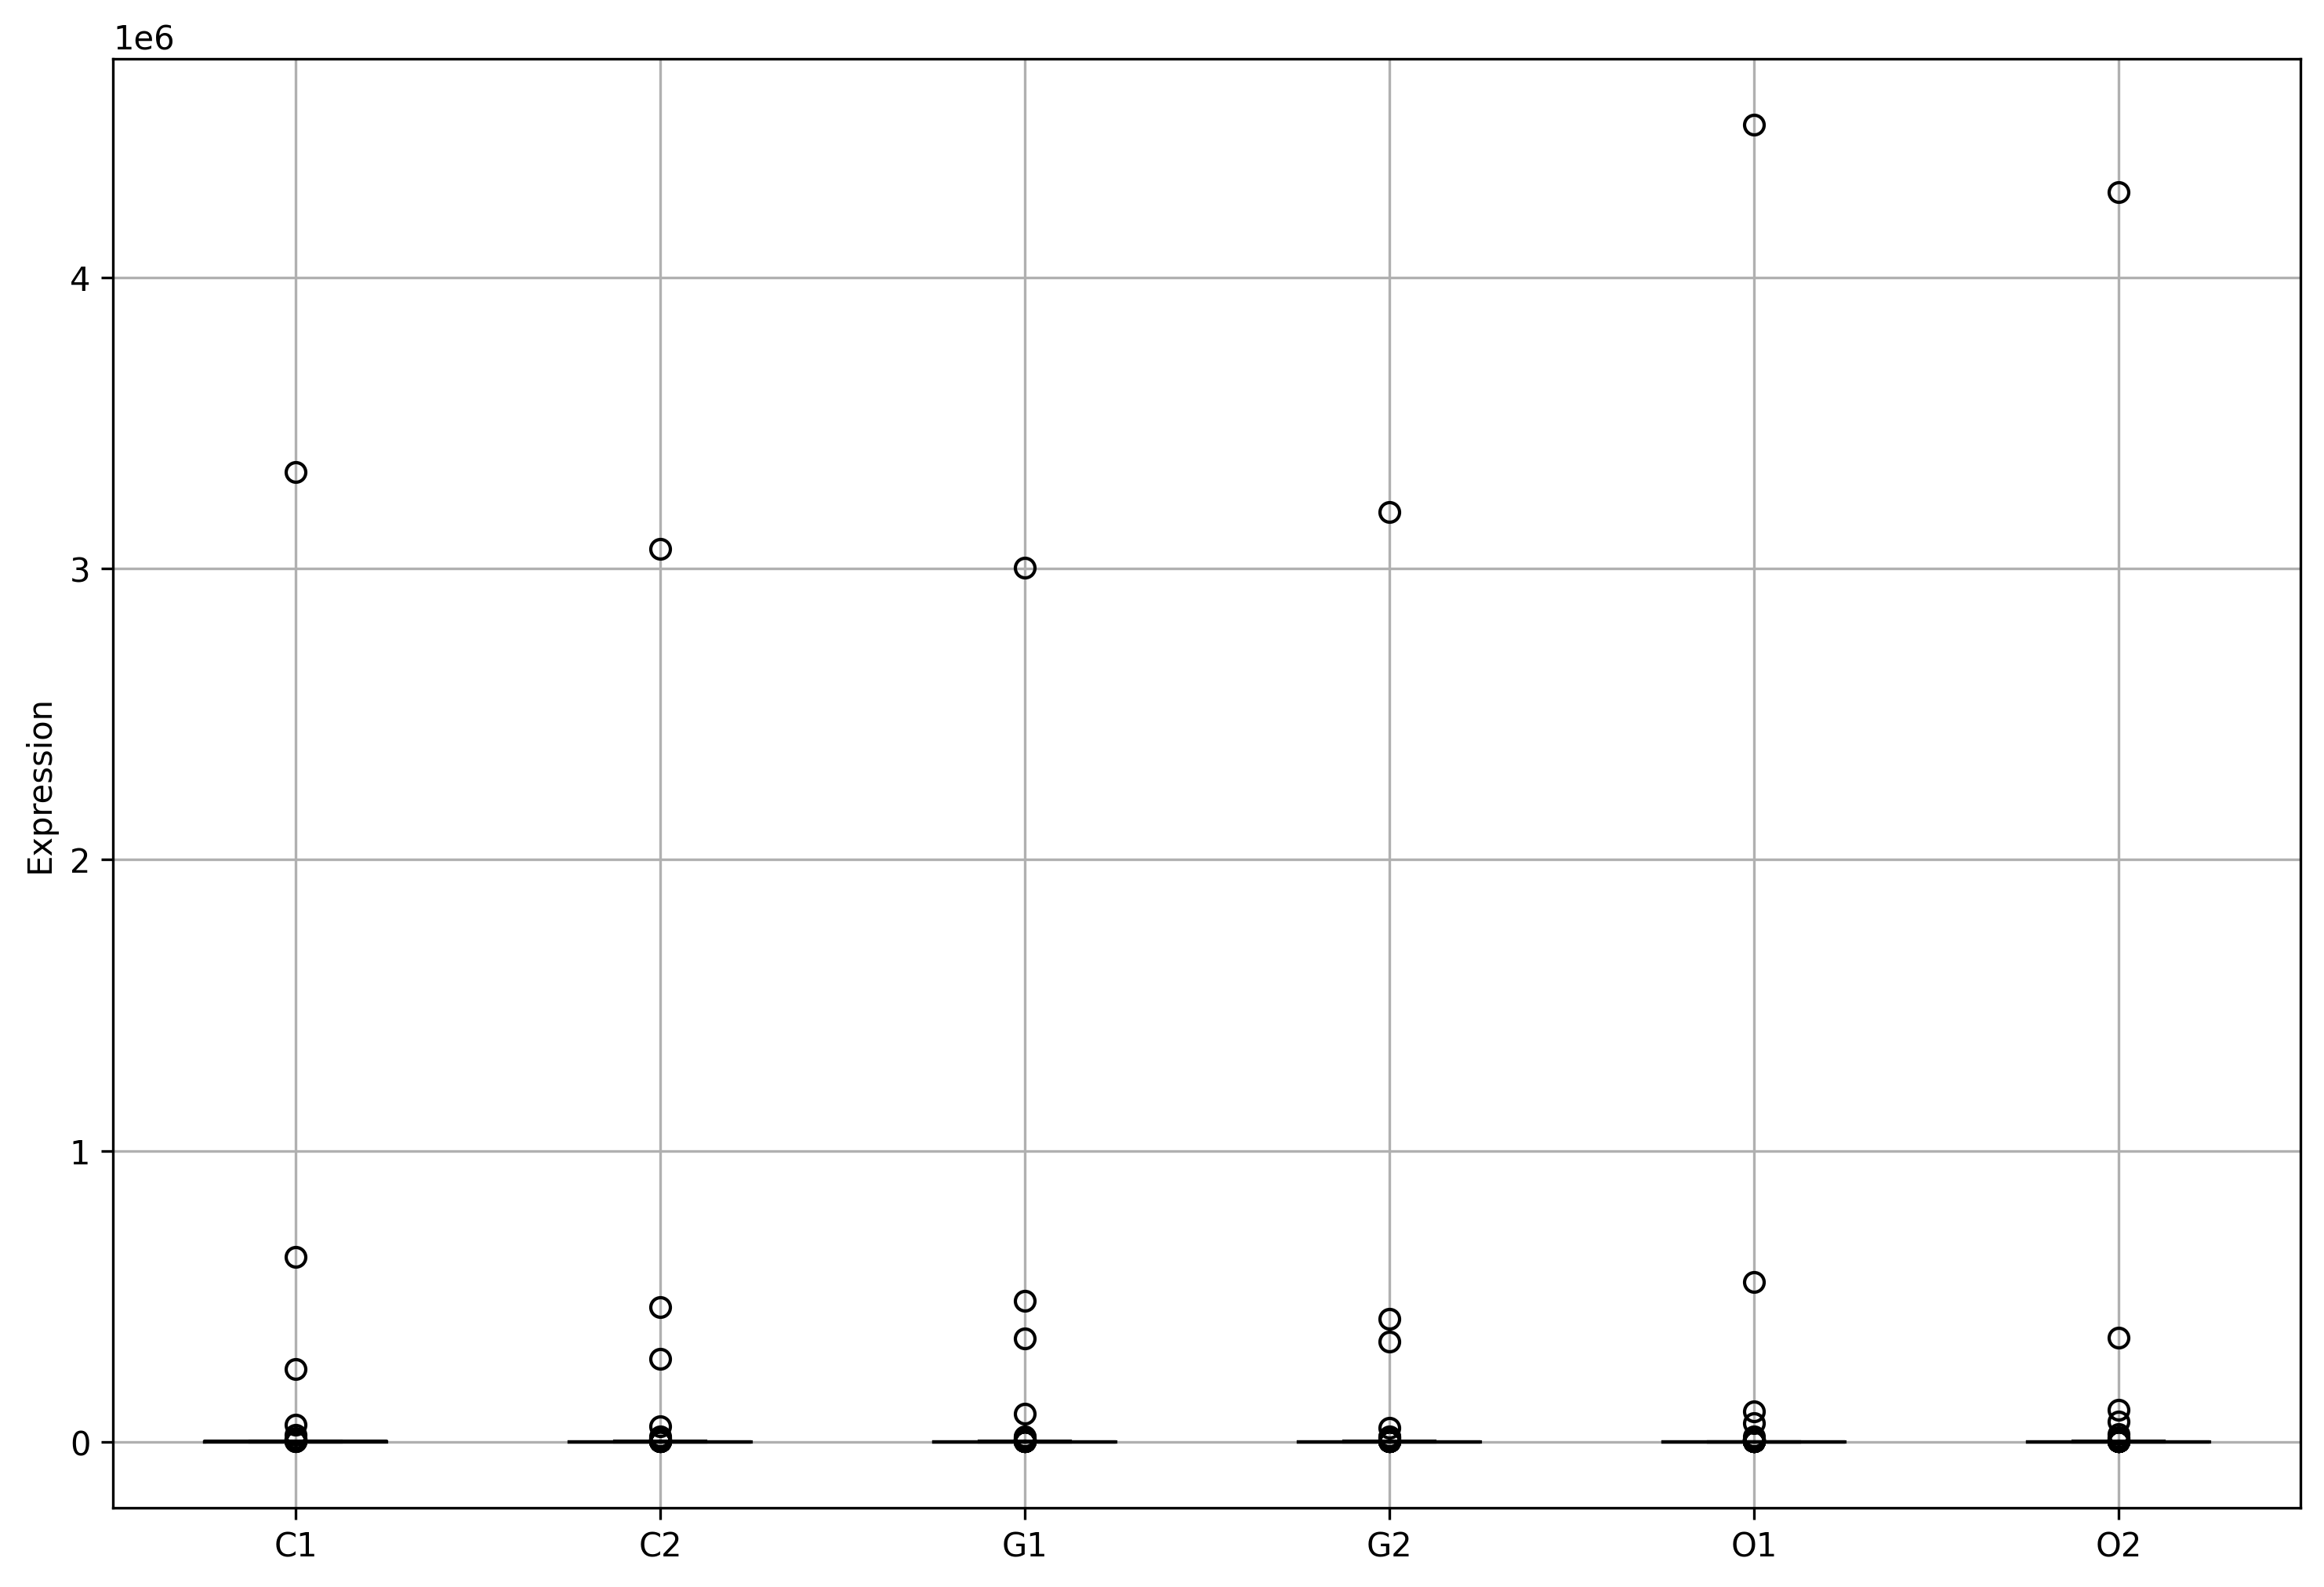

In [6]:

fig, axes = plt.subplots(figsize=(12,8))

ax = expression.boxplot(color='k',ax=axes)
ax.set_ylabel("Expression")

## Log2 Transformation

<ipython-input-7-0bff9d7258b2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_expression[i], hist=False,label=i,axlabel ='Log2 Expression')
<ipython-input-7-0bff9d7258b2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_expression[i], hist=False,label=i,axlabel ='Log2

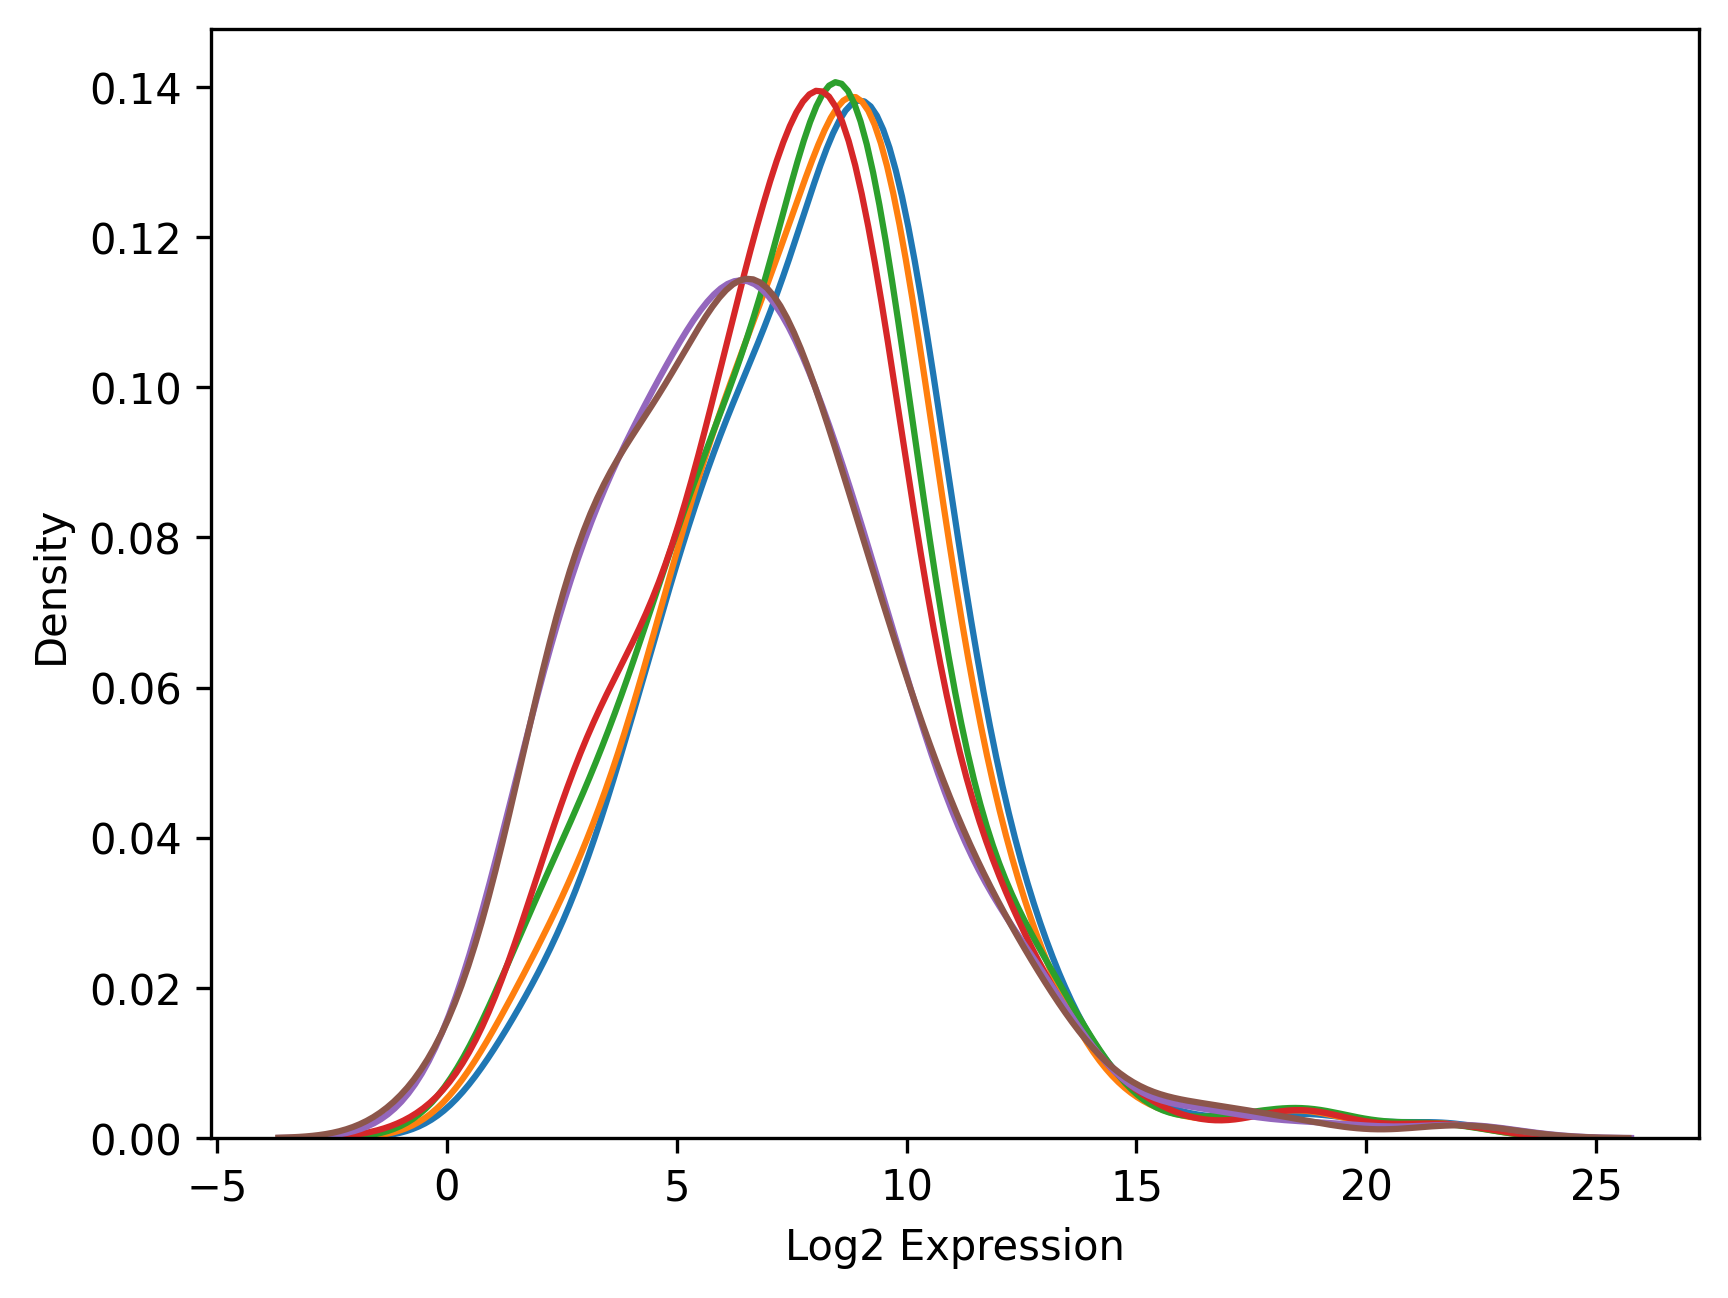

In [7]:
log_expression = np.log2(expression.iloc[:,1:])
for i in log_expression.columns:

    sns.distplot(log_expression[i], hist=False,label=i,axlabel ='Log2 Expression')

Text(0, 0.5, 'Log2 Expression')

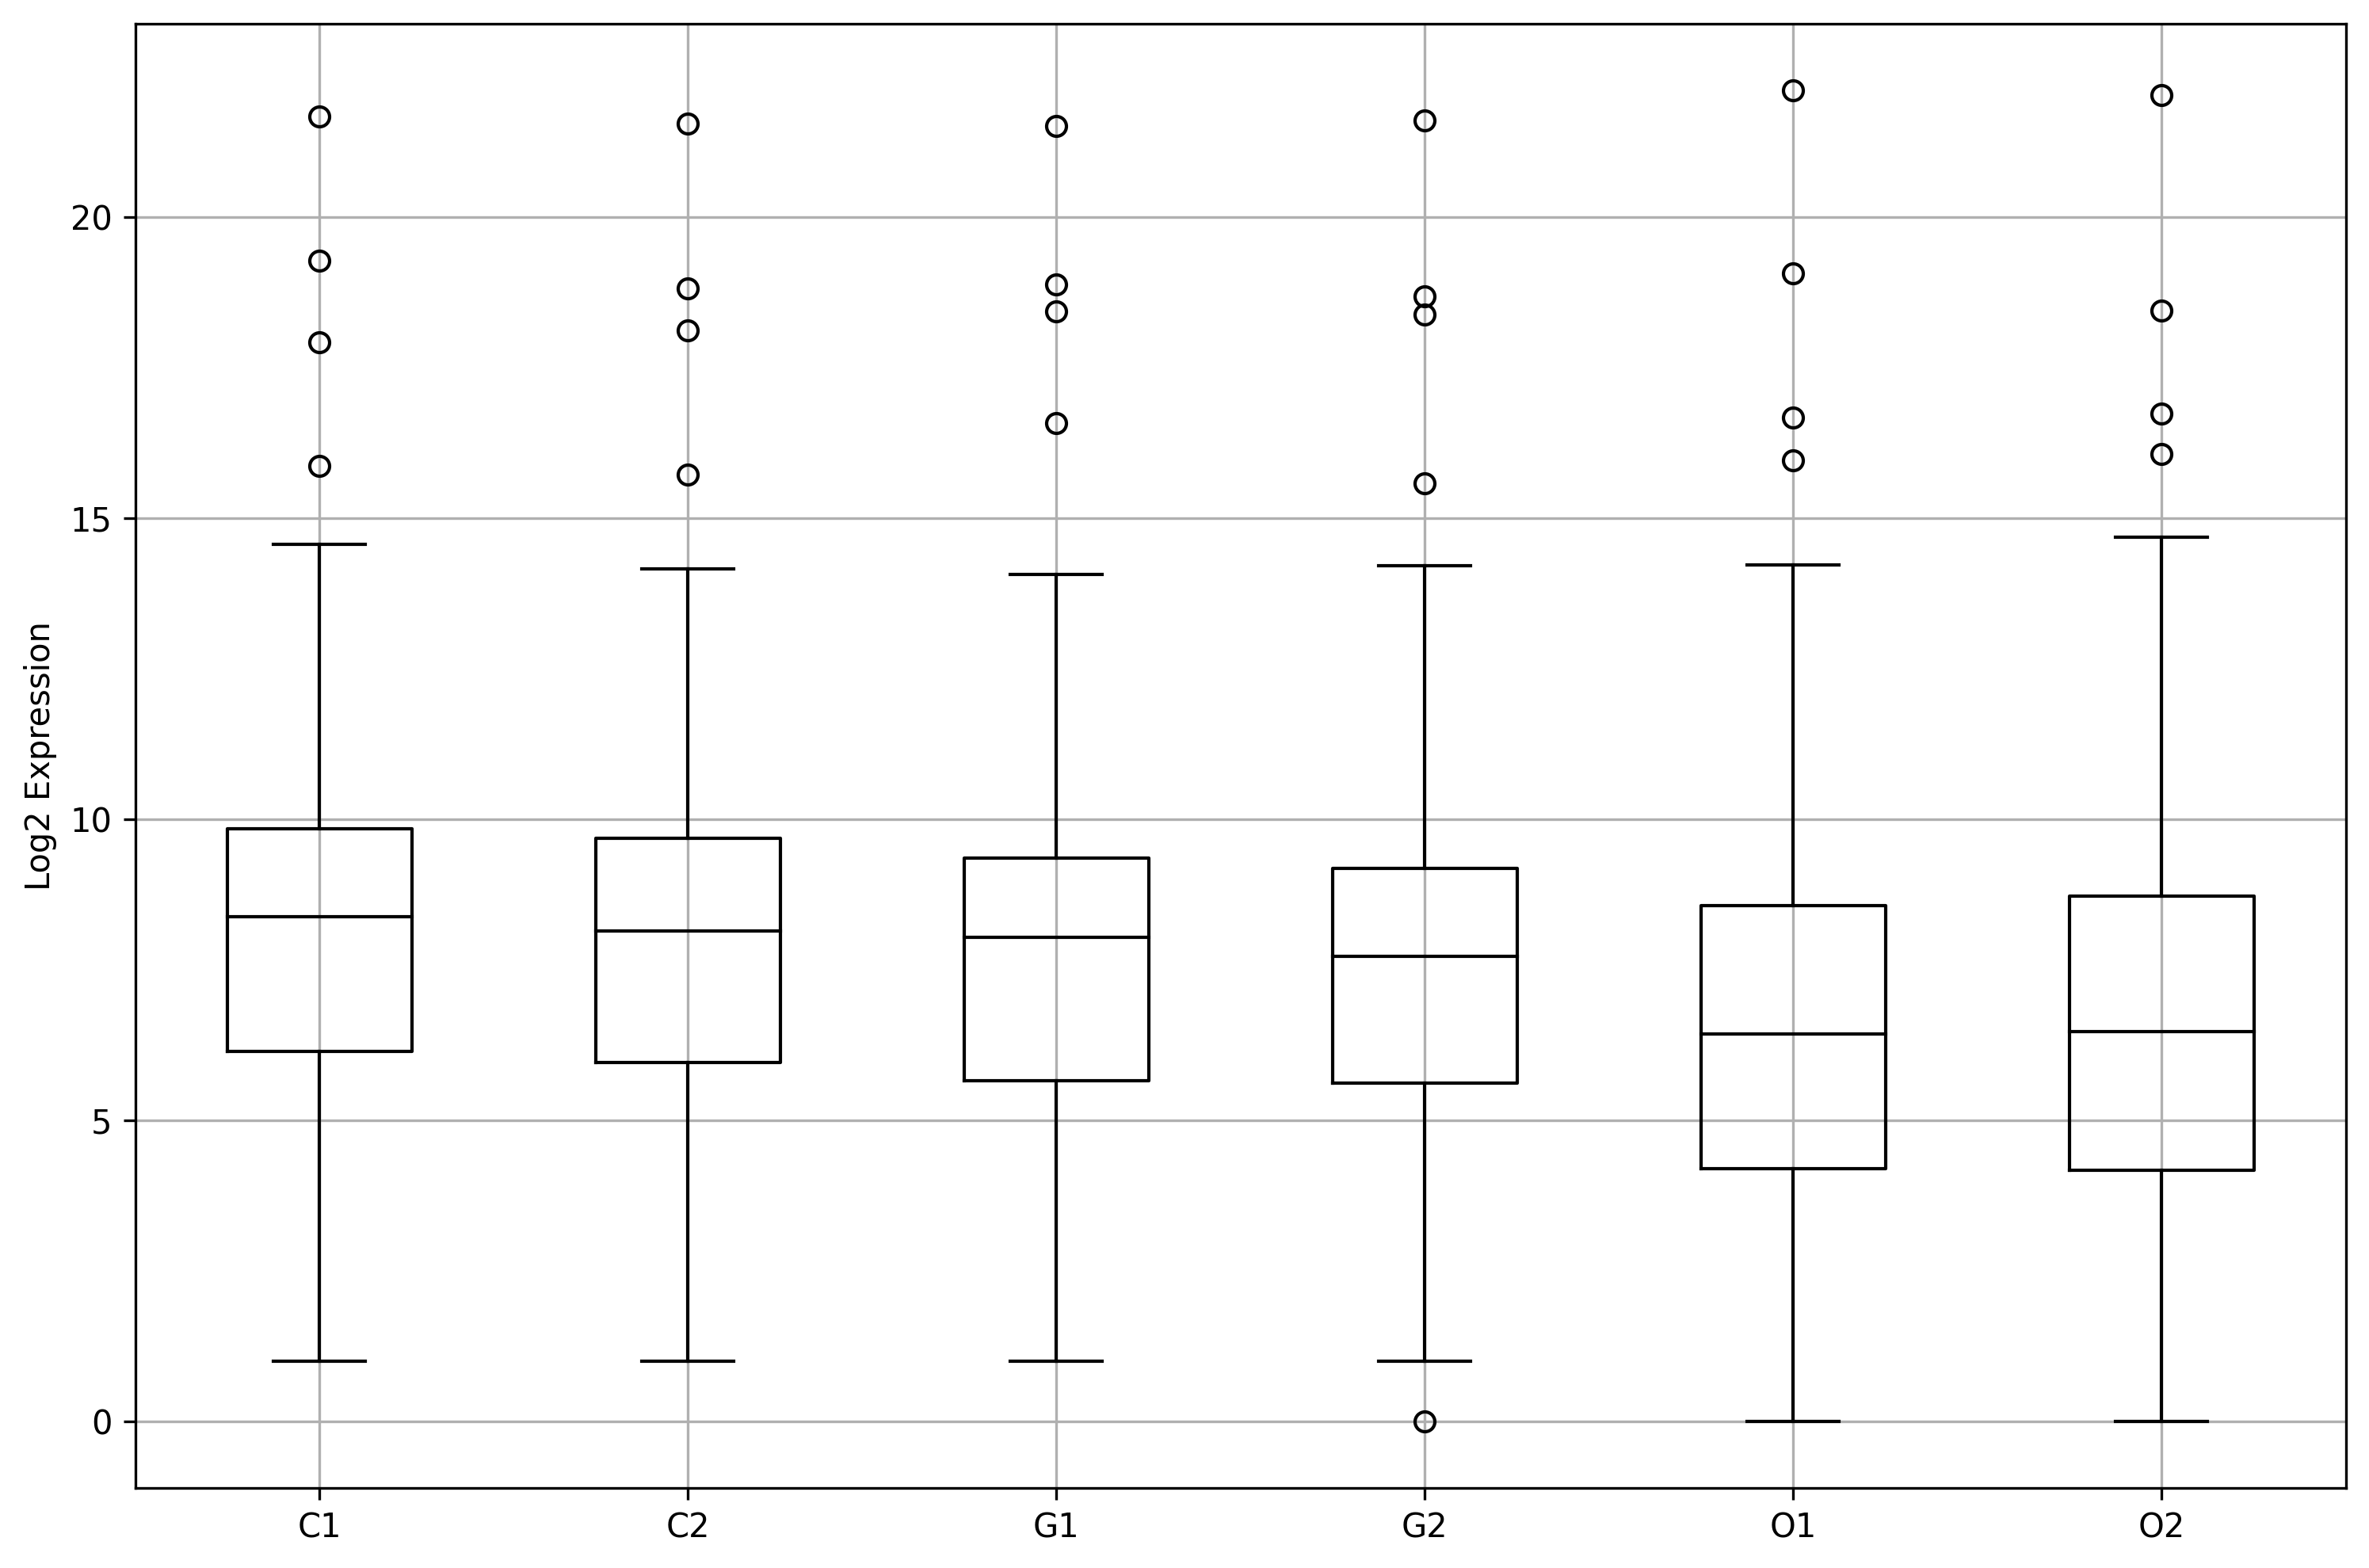

In [8]:

fig, axes = plt.subplots(figsize=(12,8))

ax = log_expression.boxplot(color='k')
ax.set_ylabel("Log2 Expression")

## Quantil Normalize

In [9]:
expression.iloc[:,1:]

,C1,C2,G1,G2,O1,O2
0,350,351,326,380,750,752
1,129,104,88,104,65,80
2,587,430,651,409,164,158
3,609,564,660,666,174,212
4,13518,13529,16978,14973,516,522
...,...,...,...,...,...,...
201,401,375,305,310,151,179
202,88,61,53,53,423,482
203,183,121,61,50,249,210
204,222,140,85,50,20,17


In [10]:
def quantileNormalize(input):
    temp = input.copy()
    #compute rank
    dic = {}
    for col in temp:
        dic.update({col : sorted(temp[col])})
    sorted_df = pd.DataFrame(dic)
    rank = sorted_df.mean(axis = 1).tolist()
    #sort
    for col in temp:
        t = np.searchsorted(np.sort(temp[col]), temp[col])
        temp[col] = [rank[i] for i in t]
    return temp

Norm_samples=quantileNormalize(expression.iloc[:,1:])
Norm_samples

,C1,C2,G1,G2,O1,O2
0,229.166667,248.666667,267.166667,403.500000,1046.166667,987.666667
1,86.666667,75.166667,75.166667,110.166667,147.500000,165.500000
2,371.666667,307.000000,621.666667,454.166667,359.833333,345.666667
3,394.333333,389.000000,643.333333,795.000000,371.666667,428.833333
4,14314.666667,14314.666667,14314.666667,14314.666667,739.500000,795.000000
...,...,...,...,...,...,...
201,260.333333,267.166667,248.666667,315.000000,325.500000,371.666667
202,57.333333,44.500000,46.666667,48.833333,667.000000,739.500000
203,110.166667,83.833333,55.000000,45.833333,437.000000,419.333333
204,141.833333,99.333333,70.833333,45.833333,46.666667,43.333333


<ipython-input-11-9d0a97baa6d6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_norm_expression[i], hist=False,label=i
<ipython-input-11-9d0a97baa6d6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_norm_expression[i], hist=False,label=i
<ipython-input-11-9d0a97baa6d6

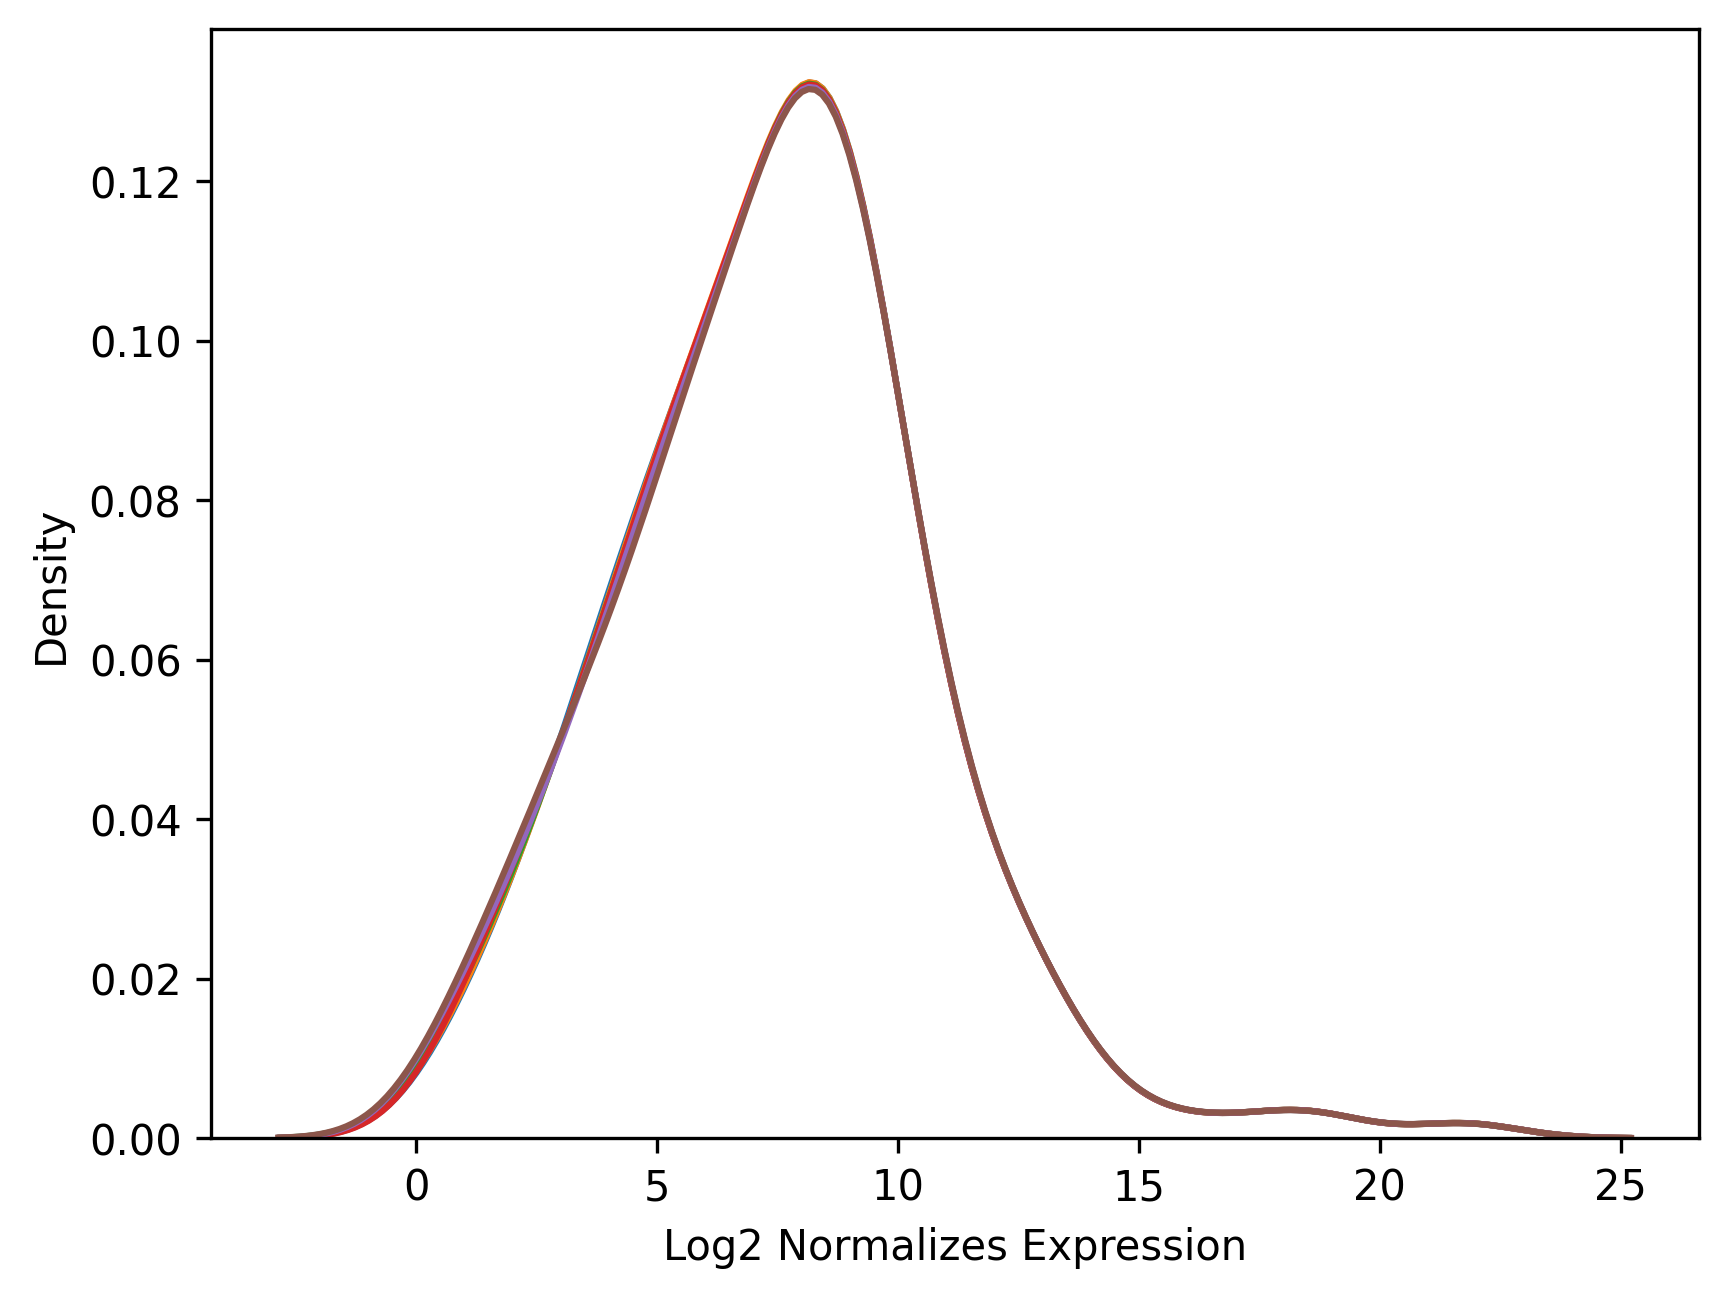

In [11]:
log_norm_expression = np.log2(Norm_samples)
for i in log_norm_expression.columns:

    sns.distplot(log_norm_expression[i], hist=False,label=i
                 ,axlabel ='Log2 Normalizes Expression')

Text(0, 0.5, 'Log2 Normalizes Expression')

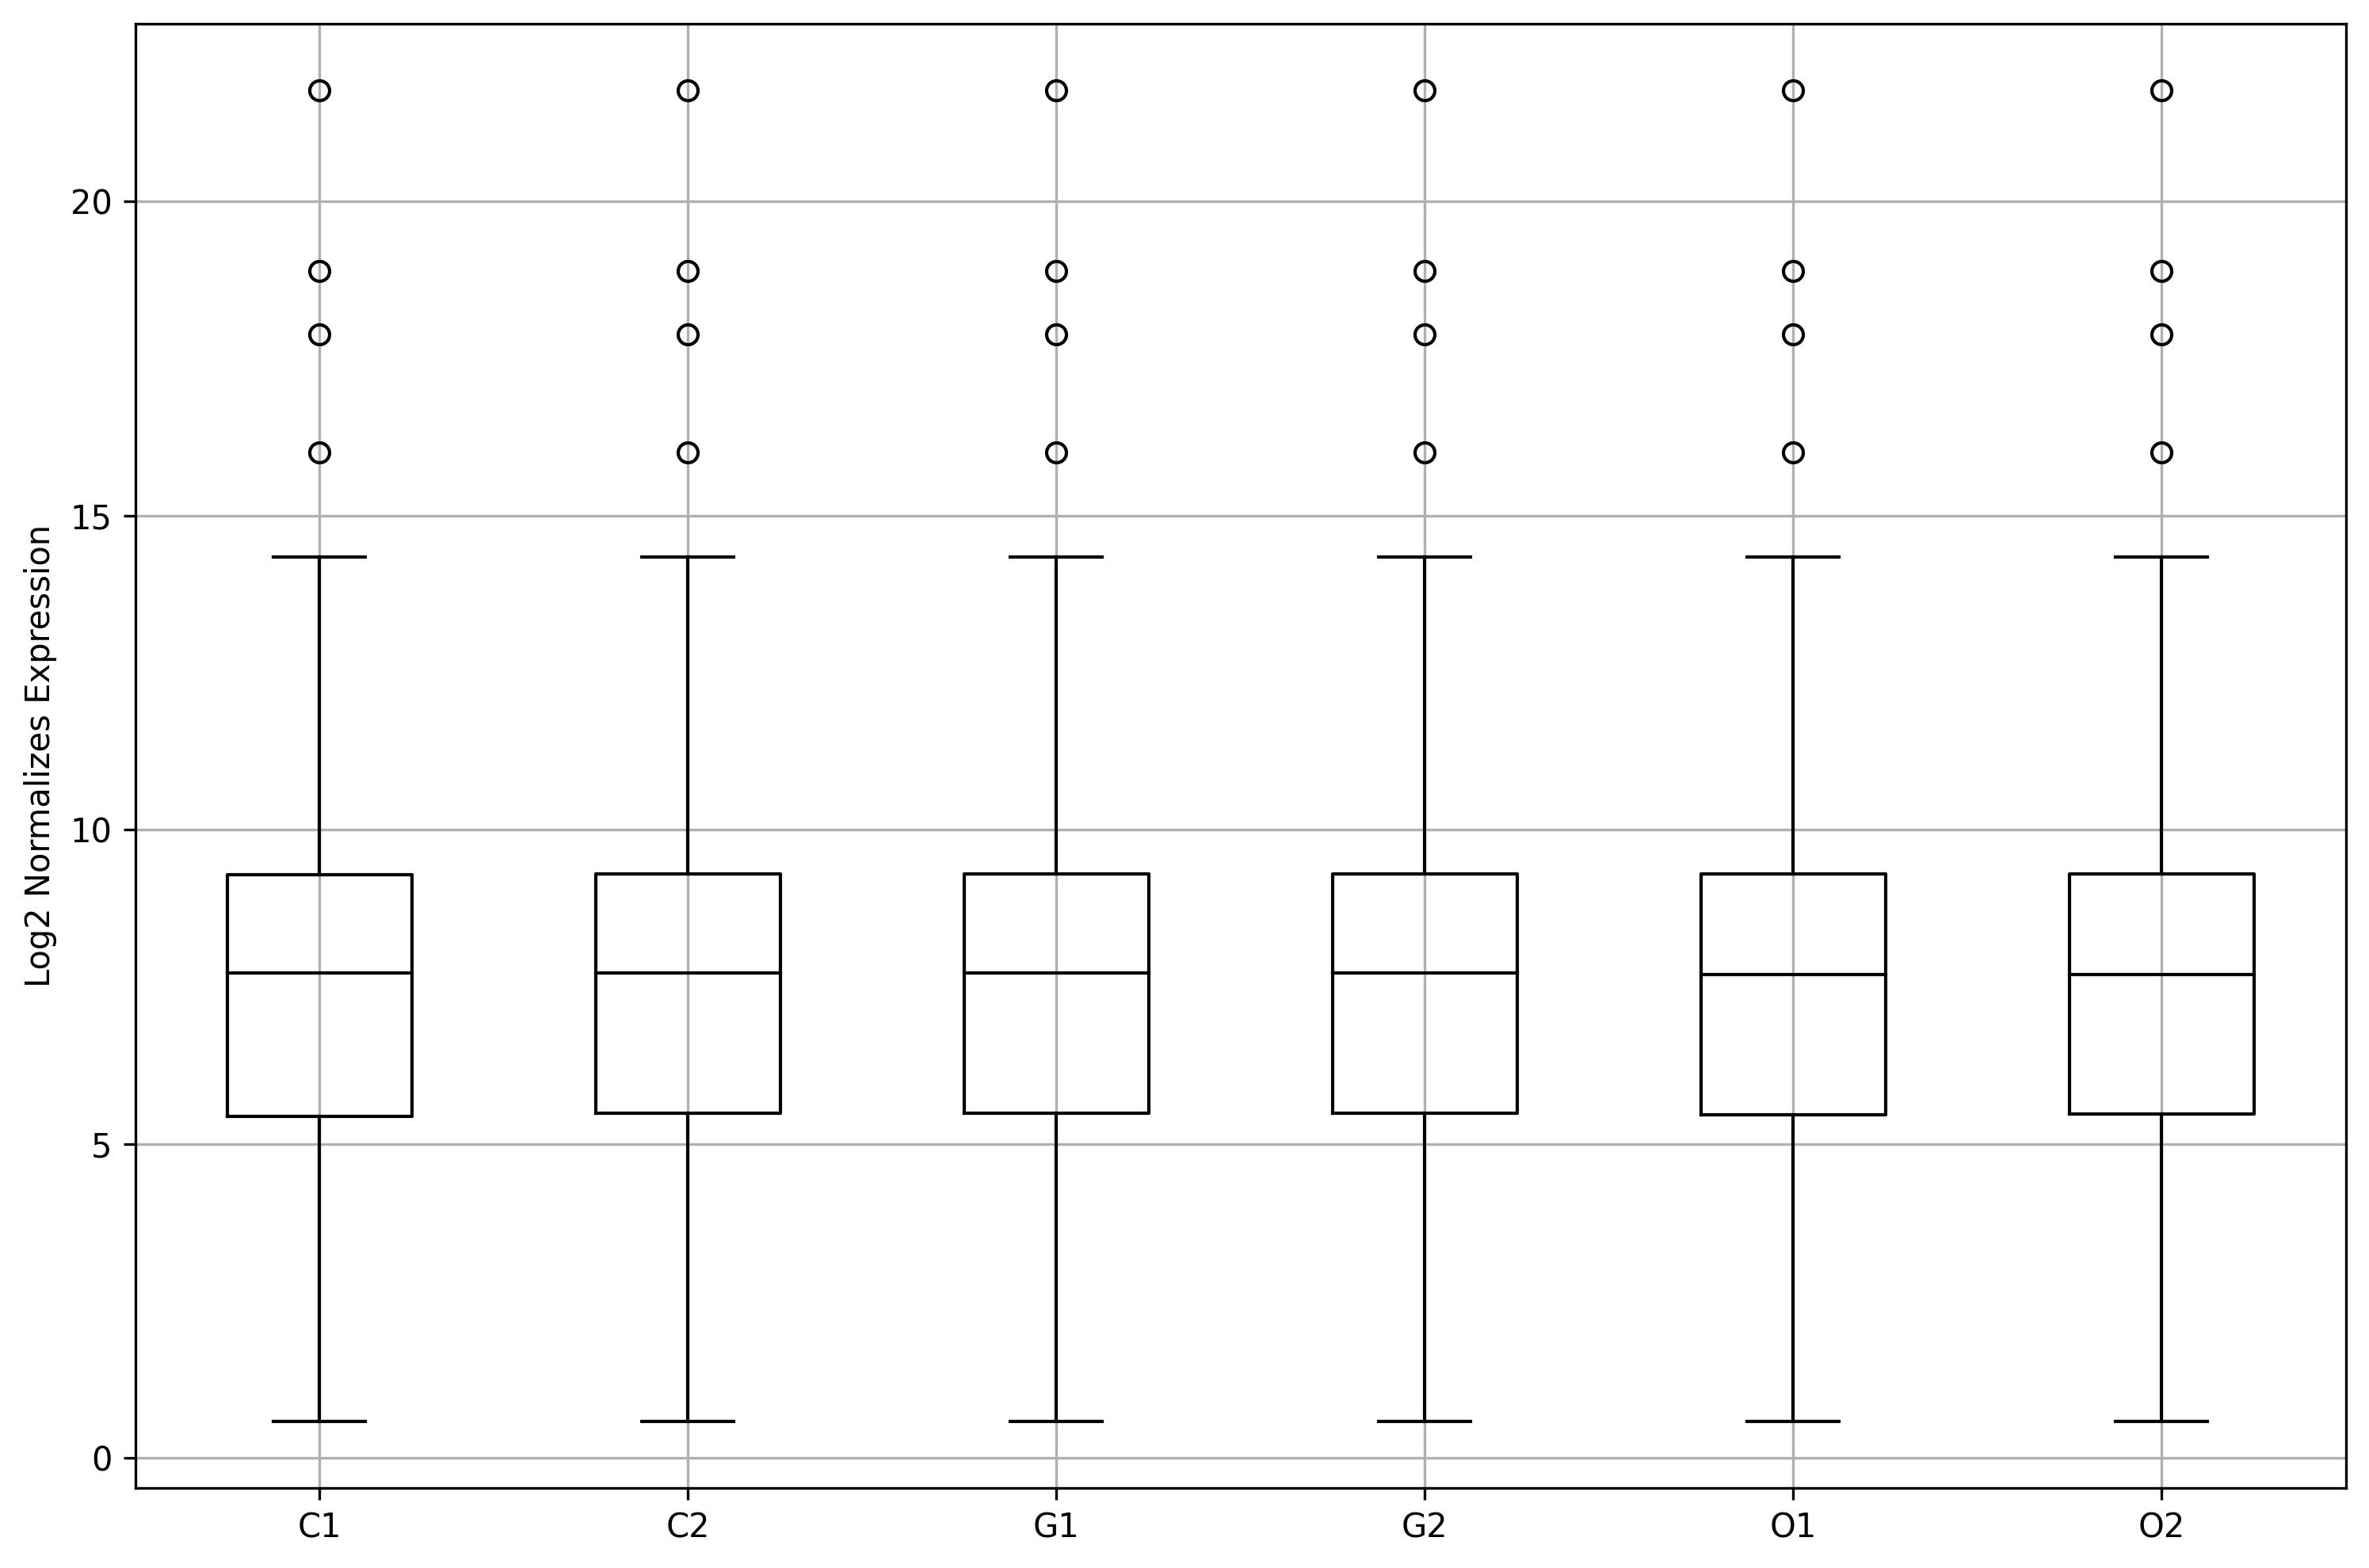

In [12]:
fig, axes = plt.subplots(figsize=(12,8))

ax = log_norm_expression.boxplot(color='k')
ax.set_ylabel('Log2 Normalizes Expression')

## Expression analysis


In [13]:
expression_transpose = log_norm_expression.T
expression_transpose.info()
expression_transpose

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, C1 to O2
Columns: 194 entries, 0 to 205
dtypes: float64(194)
memory usage: 9.3+ KB


,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,200,201,202,203,204,205
C1,7.840253,6.437405,8.537865,8.623272,13.805206,8.656425,10.153763,4.448461,5.000000,12.586371,...,9.634811,10.307201,9.005625,6.007495,3.297681,8.024216,5.841302,6.783544,7.148053,7.586214
C2,7.958069,6.232021,8.262095,8.603626,13.805206,9.005625,10.307201,3.754888,4.502500,12.489555,...,10.153763,9.602699,8.921841,6.146357,3.584963,8.061596,5.475733,6.389452,6.634206,7.531381
G1,8.061596,6.232021,9.279997,9.329423,13.805206,8.921841,10.727353,2.169925,2.938599,12.489555,...,10.307201,9.142107,8.402302,5.475733,3.297681,7.958069,5.544321,5.781360,6.146357,6.768184
G2,8.656425,6.783544,8.827078,9.634811,13.805206,9.105035,10.418204,3.222392,4.073249,12.384424,...,10.614710,9.216746,8.711954,5.584963,3.790077,8.299208,5.609794,5.518325,5.518325,6.768184
O1,10.030897,7.204571,8.491185,8.537865,9.530406,8.158189,11.149535,1.000000,6.389452,12.586371,...,7.958069,4.222392,1.000000,2.058894,3.142958,8.346514,9.381543,8.771489,5.544321,8.603626
O2,9.947880,7.370687,8.433238,8.744273,9.634811,8.108524,11.041887,1.662965,5.781360,12.489555,...,7.173261,5.235216,3.297681,2.662965,2.662965,8.537865,9.530406,8.711954,5.437405,8.585589


## Standardization




In [14]:
expression_transpose_std = (expression_transpose-expression_transpose.mean()
                           )/expression_transpose.std()
expression_transpose_std = expression_transpose_std.replace(
    [np.inf, -np.inf], np.nan)
expression_transpose_std = expression_transpose_std.dropna(axis=1)

## PCA

In [15]:
sklearn_pca = PCA(n_components=2)

print(expression_transpose_std.shape)

PCs = sklearn_pca.fit_transform(expression_transpose)
print(PCs.shape)
print(sklearn_pca.explained_variance_ratio_)

(6, 193)
(6, 2)
[0.93244404 0.03461341]


<Axes: xlabel='PC1', ylabel='PC2'>

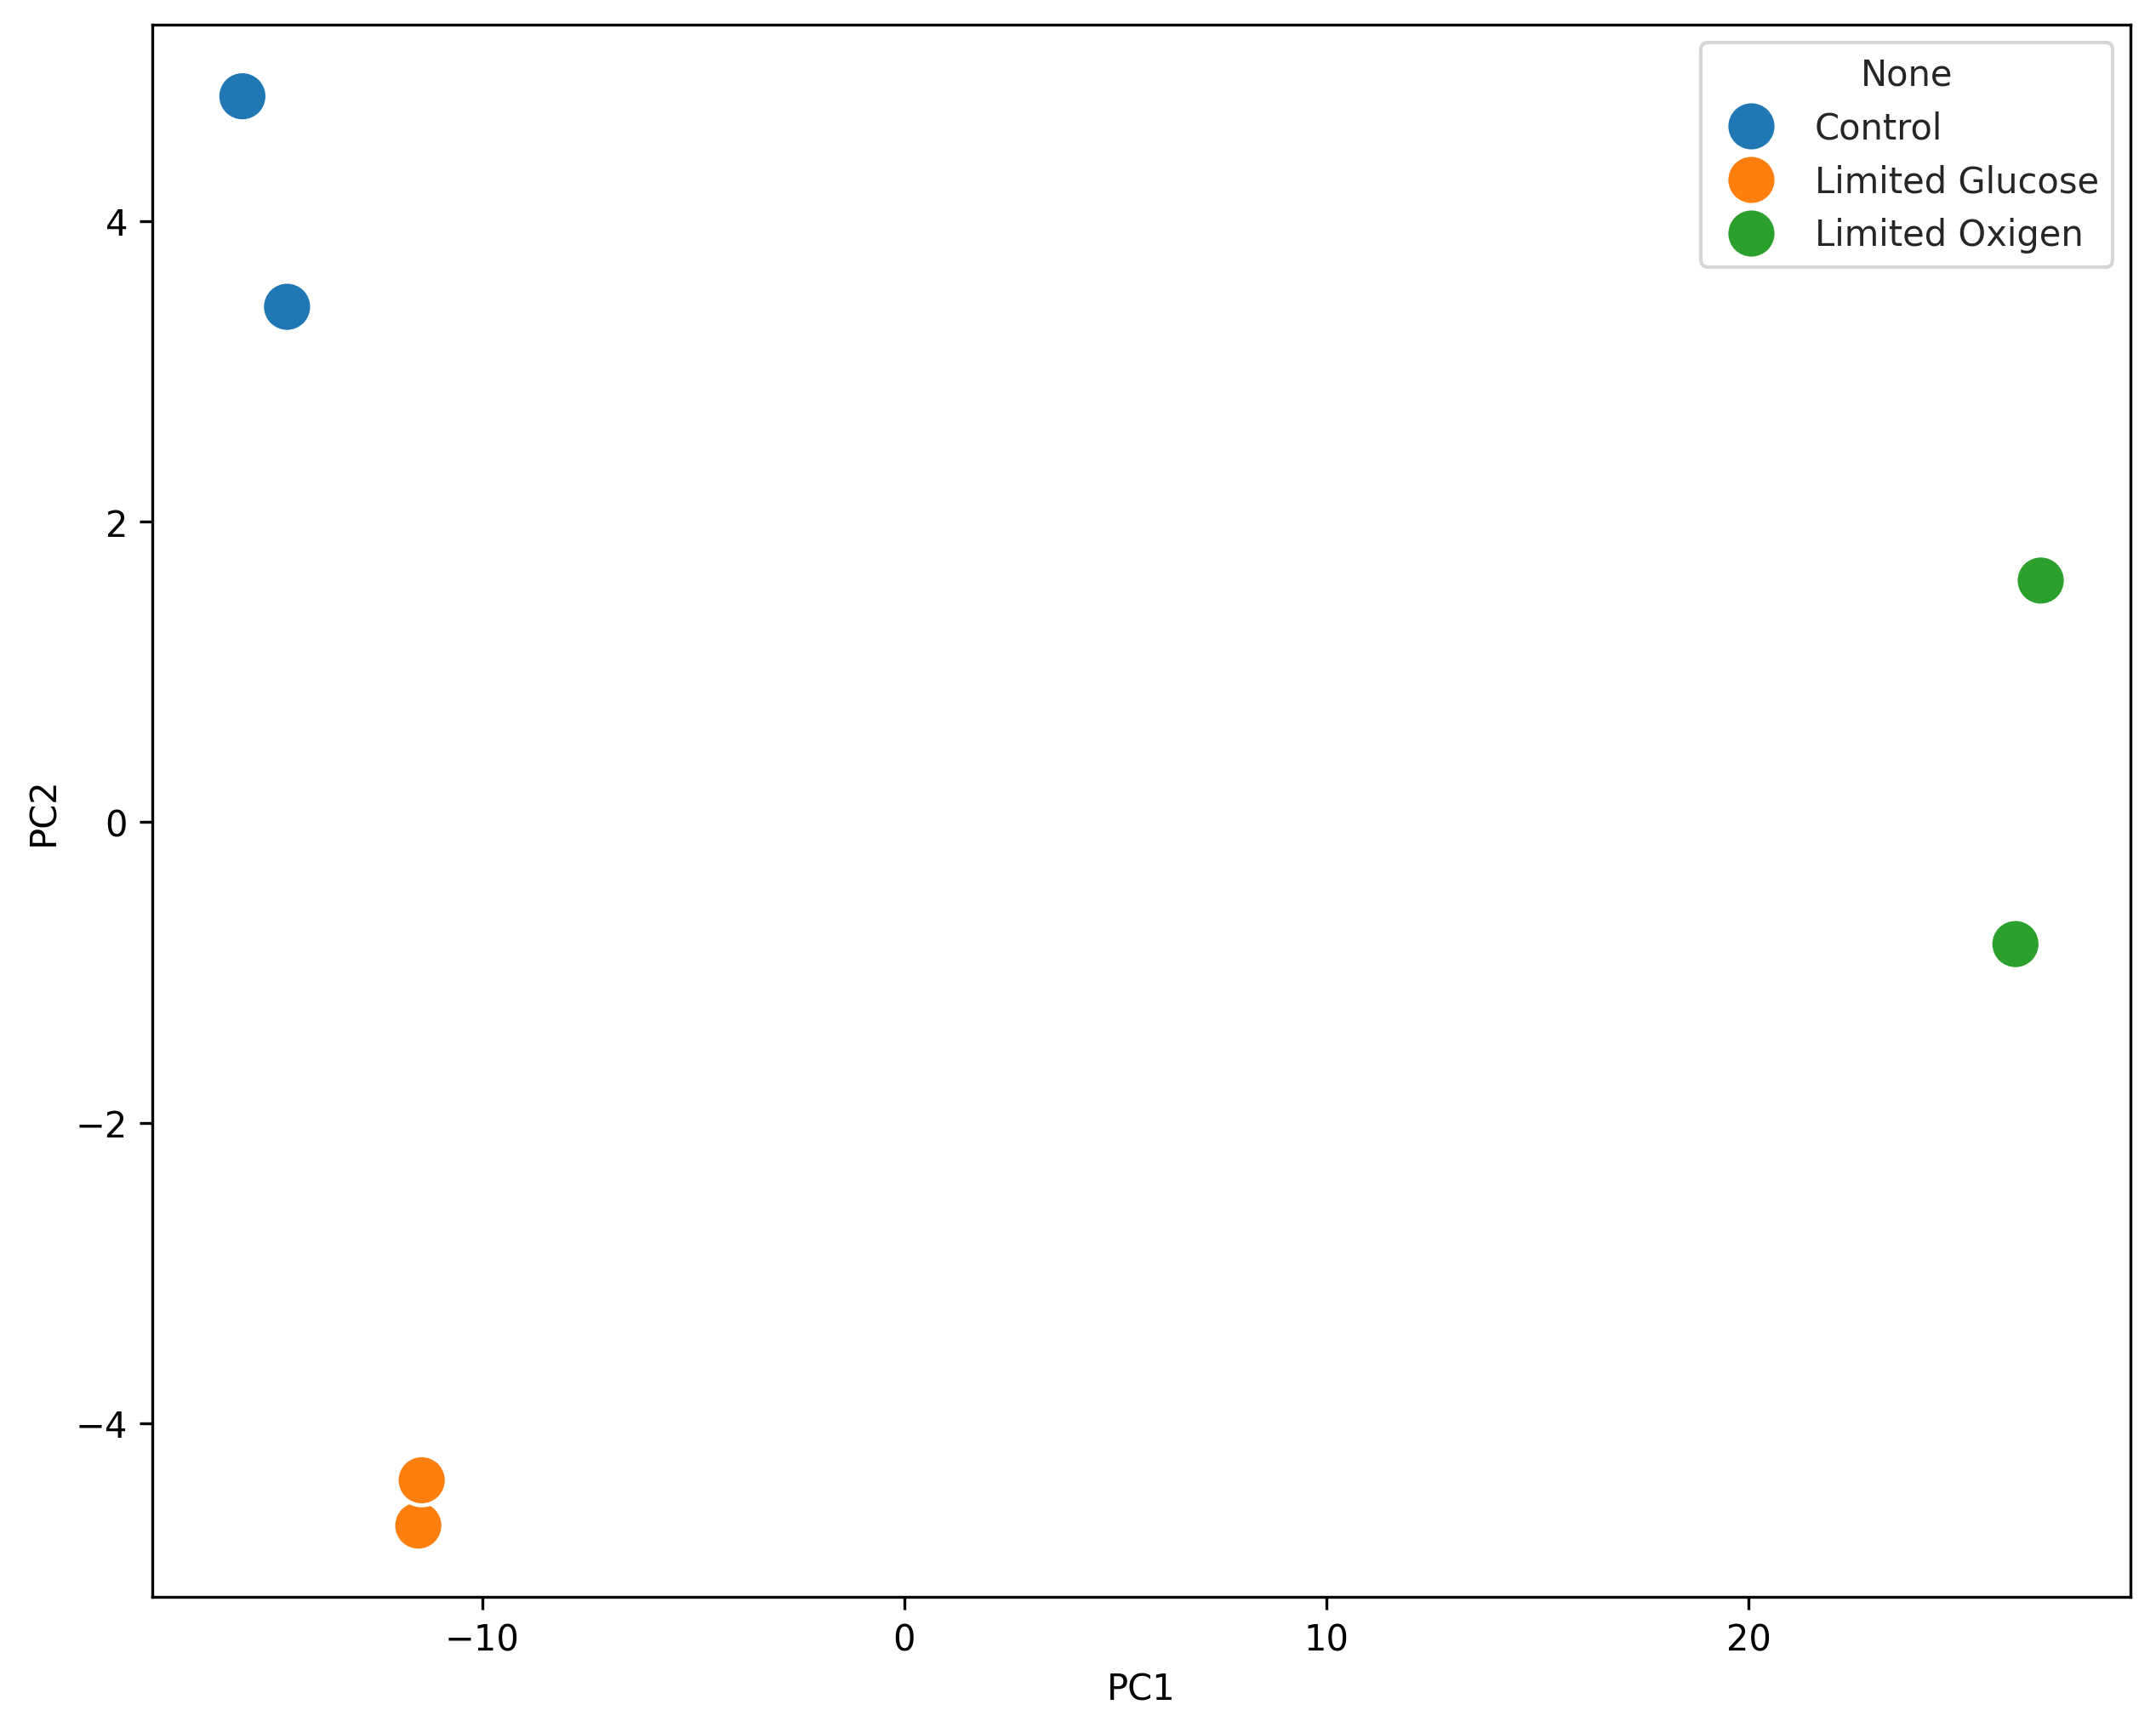

In [16]:
expression_PCs = pd.DataFrame(PCs,columns=['PC1','PC2'])
expression_PC1 = expression_PCs.set_index(
    np.array((['Control']*2)+['Limited Glucose']*2+['Limited Oxigen']*2))
expression_PC2 = expression_PCs.set_index(expression_transpose.index)
fig, axes = plt.subplots(figsize=(10,8))
sns.set_style("whitegrid")
sns.scatterplot(x='PC1',y='PC2',data = expression_PC2,
                hue =expression_PC1.index, s=200)

In [17]:
expression_PC1

,PC1,PC2
Control,-15.675024,4.830623
Control,-14.617167,3.429893
Limited Glucose,-11.509235,-4.679826
Limited Glucose,-11.428267,-4.378422
Limited Oxigen,26.914558,1.608258
Limited Oxigen,26.315135,-0.810526


## T-Test

In [18]:
from scipy import stats
control_mean = log_norm_expression.iloc[:,:2].mean(axis=1) #Controls
treated_mean = log_norm_expression.iloc[:,2:4].mean(axis=1) #Glucose

compair_means=pd.DataFrame(columns=['Control_Mean','Treated_mean'])
compair_means['Control_Mean']=control_mean
compair_means['Treated_mean']=treated_mean
compair_means['log2_fold_change'] = (compair_means['Treated_mean']-
                                     compair_means['Control_Mean'])


t_tset_values = pd.DataFrame(stats.ttest_ind(
    log_norm_expression.iloc[:,:2],log_norm_expression.iloc[:,2:4],axis=1)).T #Same

t_tset_values.columns = ['Stastics','Pvalue']

compair_means_G = pd.concat([expression.iloc[:,0],compair_means,t_tset_values],axis=1)
compair_means_G.head(3)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


,Geneid,Control_Mean,Treated_mean,log2_fold_change,Stastics,Pvalue
0,b4413,7.899161,8.359011,0.459849,-1.516693,0.268616
1,b4762,6.334713,6.507783,0.173069,-0.588147,0.616001
2,b4577,8.399980,9.053538,0.653558,-2.465003,0.132613


In [19]:
log_norm_expression.iloc[:,2:4] #Treated Glucose

,G1,G2
0,8.061596,8.656425
1,6.232021,6.783544
2,9.279997,8.827078
3,9.329423,9.634811
4,13.805206,13.805206
...,...,...
201,7.958069,8.299208
202,5.544321,5.609794
203,5.781360,5.518325
204,6.146357,5.518325


In [20]:
from scipy import stats
control_mean = log_norm_expression.iloc[:,:2].mean(axis=1) #Controls
treated_mean = log_norm_expression.iloc[:,4:].mean(axis=1) #Oxigen

compair_means=pd.DataFrame(columns=['Control_Mean','Treated_mean'])
compair_means['Control_Mean']=control_mean
compair_means['Treated_mean']=treated_mean
compair_means['log2_fold_change'] = (compair_means['Treated_mean']-
                                     compair_means['Control_Mean'])


t_tset_values = pd.DataFrame(stats.ttest_ind(
    log_norm_expression.iloc[:,:2],log_norm_expression.iloc[:,4:],axis=1)).T #Same

t_tset_values.columns = ['Stastics','Pvalue']

compair_means_O = pd.concat([expression.iloc[:,0],compair_means,t_tset_values],axis=1)
compair_means_O.head()
#Oxigen T-test


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


,Geneid,Control_Mean,Treated_mean,log2_fold_change,Stastics,Pvalue
0,b4413,7.899161,9.989389,2.090227,-29.005528,0.001186
1,b4762,6.334713,7.287629,0.952916,-7.214855,0.018674
2,b4577,8.399980,8.462211,0.062231,-0.441680,0.701886
3,b4810,8.613449,8.641069,0.027620,-0.266424,0.814866
4,b4414,13.805206,9.582609,-4.222598,80.889026,0.000153


In [21]:
log_norm_expression.iloc[:,4:] #Treated oxigen

,O1,O2
0,10.030897,9.947880
1,7.204571,7.370687
2,8.491185,8.433238
3,8.537865,8.744273
4,9.530406,9.634811
...,...,...
201,8.346514,8.537865
202,9.381543,9.530406
203,8.771489,8.711954
204,5.544321,5.437405


## Selecting Significat genes (P<0.05 and log2 Fold change >1.5)

In [23]:
significant_table_G = compair_means_G[compair_means_G['Pvalue']<0.05]
significant_table_G.head()

,Geneid,Control_Mean,Treated_mean,log2_fold_change,Stastics,Pvalue
3,b4810,8.613449,9.482117,0.868668,-5.677202,0.029653
17,b4831,12.327506,12.485397,0.157892,5.841216,0.028080
19,b4835,5.143439,5.417718,0.274279,-4.605564,0.044053
24,b0668,8.738810,8.139575,-0.599235,7.564329,0.017031
25,b0670,9.124886,8.520458,-0.604428,6.331101,0.024052


In [24]:
significant_table_O = compair_means_O[compair_means_O['Pvalue']<0.05]
significant_table_O.head()

,Geneid,Control_Mean,Treated_mean,log2_fold_change,Stastics,Pvalue
0,b4413,7.899161,9.989389,2.090227,-29.005528,0.001186
1,b4762,6.334713,7.287629,0.952916,-7.214855,0.018674
4,b4414,13.805206,9.582609,-4.222598,80.889026,0.000153
6,b0201,10.230482,11.095711,0.865229,-9.232396,0.011529
7,b0202,4.101674,1.331483,-2.770191,5.774472,0.028705


## Differentially Expressed Genes


In [25]:
Upregulated_genes_G = significant_table_G[
    significant_table_G['log2_fold_change']>1.5]
Downregulated_genes_G = significant_table_G[
    significant_table_G['log2_fold_change']<-1.5]
print('Upregulated Genes')
Upregulated_genes_G.info()
print('\nDownregulated Genes')
Downregulated_genes_G.info()

Upregulated Genes
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Geneid            0 non-null      object 
 1   Control_Mean      0 non-null      float64
 2   Treated_mean      0 non-null      float64
 3   log2_fold_change  0 non-null      float64
 4   Stastics          0 non-null      float64
 5   Pvalue            0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 0.0+ bytes

Downregulated Genes
<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 52 to 52
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Geneid            1 non-null      object 
 1   Control_Mean      1 non-null      float64
 2   Treated_mean      1 non-null      float64
 3   log2_fold_change  1 non-null      float64
 4   Stastics          1 non-null      float64
 5   Pvalue      

In [26]:
Upregulated_genes_O = significant_table_O[
    significant_table_O['log2_fold_change']>1.5]
Downregulated_genes_O = significant_table_O[
    significant_table_O['log2_fold_change']<-1.5]
print('Upregulated Genes')
Upregulated_genes_O.info()
print('\nDownregulated Genes')
Downregulated_genes_O.info()

Upregulated Genes
<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 192
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Geneid            31 non-null     object 
 1   Control_Mean      31 non-null     float64
 2   Treated_mean      31 non-null     float64
 3   log2_fold_change  31 non-null     float64
 4   Stastics          31 non-null     float64
 5   Pvalue            31 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.7+ KB

Downregulated Genes
<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 4 to 185
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Geneid            35 non-null     object 
 1   Control_Mean      35 non-null     float64
 2   Treated_mean      35 non-null     float64
 3   log2_fold_change  35 non-null     float64
 4   Stastics          35 non-null     float64
 5   Pva

In [27]:
DEGs_G = pd.concat([Upregulated_genes_G,Downregulated_genes_G])
DEGs_G.head()

,Geneid,Control_Mean,Treated_mean,log2_fold_change,Stastics,Pvalue
52,b1230,8.270881,6.767303,-1.503578,-8.313782,0.014161


In [28]:
DEGs_O = pd.concat([Upregulated_genes_O,Downregulated_genes_O])
DEGs_O.head()

,Geneid,Control_Mean,Treated_mean,log2_fold_change,Stastics,Pvalue
0,b4413,7.899161,9.989389,2.090227,-29.005528,0.001186
15,b0455,2.564642,5.907425,3.342783,-15.083142,0.004367
16,b4585,5.602693,8.799311,3.196618,18.027233,0.003063
40,b0883,5.668129,9.179426,3.511297,-14.747525,0.004566
42,b1032,2.902961,6.733548,3.830587,37.823575,0.000698


In [50]:
DEGs_G.to_excel('DEGs_up_and_down_G.xlsx')
DEGs_O.to_excel('DEGs_up_and_down_O.xlsx')

print("Save as 'DEGs_up_and_down.xlsx'")

Save as 'DEGs_up_and_down.xlsx'
